<a href="https://colab.research.google.com/github/MathalinAK/NLP/blob/main/food_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#ignoring the warning in our code

In [4]:
data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.shape

(1000, 2)

In [ ]:
data.isnull().sum()

,0
Review,0
Liked,0


In [ ]:
count=data['Liked'].value_counts()

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data['chat_count']=data['Review'].apply(len)

In [ ]:
data.head()

,Review,Liked,chat_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
data['word_count']=data['Review'].apply(lambda x:len(str(x).split()))

In [ ]:
data.head()

,Review,Liked,chat_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [ ]:
data['sent_count'] = data['Review'].apply(lambda x: len(list(nlp(str(x)).sents)))

In [ ]:
data.head()

,Review,Liked,chat_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
data['char_count'] = data['Review'].apply(len)  # Create the 'char_count' column
data[data['Liked']==1]['char_count'].mean()     # Now calculate the mean

55.88

In [ ]:
data[data['Liked']==0]['char_count'].mean()

60.75

cleaning the text

In [ ]:
import re

In [ ]:
data['Review'][0]

'Wow... Loved this place.'

In [ ]:
review=re.sub('[^a-zA-Z]',' ',data['Review'][0])#removing all the non alphabetics

In [ ]:
review

'Wow    Loved this place '

In [ ]:
review=review.split()

In [ ]:
review

['Wow', 'Loved', 'this', 'place']

In [ ]:
# Cleaning a single review
review = re.sub('[^a-zA-Z]', ' ', data['Review'][0])  # Remove non-alphabetic characters
review = review.lower()  # Convert to lowercase
doc = nlp(review)
filtered_review = [token.text for token in doc if not token.is_stop]

print("Original Review:", data['Review'][0])
print("Filtered Review (No Stopwords):", filtered_review)


Original Review: Wow... Loved this place.
Filtered Review (No Stopwords): ['wow', '   ', 'loved', 'place']


In [ ]:
# Use spaCy to filter stopwords
doc = nlp(review)
filtered_review = [token.text for token in doc if not token.is_stop]  # Remove stopwords

print("Filtered Review (No Stopwords):", filtered_review)


Filtered Review (No Stopwords): ['wow', '   ', 'loved', 'place']


In [ ]:
review = [token.text for token in doc if token.text not in nlp.Defaults.stop_words]



In [ ]:
review

['wow', '   ', 'loved', 'place']

In [ ]:
#to remove allthe stopwords
all_stopwords = nlp.Defaults.stop_words
if 'not' in all_stopwords:
    nlp.Defaults.stop_words.remove('not')
all_stopwords = list(nlp.Defaults.stop_words)
print(all_stopwords)


['therefore', 'indeed', 'via', 'anything', 'sometime', 'always', 'how', 'we', 'ourselves', 'yourself', 'its', 'made', 'get', 'on', 'already', 'then', 'many', 'amongst', 'somehow', 'should', 'hereby', 'amount', 'be', 'forty', 'was', 'does', 'twelve', 'everything', 'hers', 'toward', 'further', 'never', 'along', 'wherein', 'former', 'nowhere', 'something', 'regarding', 'bottom', 'hereafter', 'though', 'six', 'too', 'whereupon', 'formerly', 'out', 'they', 'upon', 'without', 'being', 'becomes', 'top', 'had', 'last', 'must', 'beyond', 'through', 'these', 'nothing', 'three', 'my', 'do', 'due', 'various', 'those', 'or', 'whom', 'himself', 'much', 'next', 'this', 'behind', 'third', 'across', 'used', 'an', '’d', 'front', 'rather', 'noone', 'than', 'while', 'can', 'down', 'again', 'nine', 'me', 'around', 'whereas', 'where', 'yourselves', 'mine', 'besides', 'ever', 'say', 'really', 'keep', 'everyone', '‘ve', 'up', '’m', 'which', 'until', 'fifty', '’ve', 'well', 'thence', 'per', 'did', 'eight', 'be

In [ ]:
duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(duplicates))

There are 4 duplicate reviews present in the dataset


In [ ]:
#view duplicate reviews
review = data['Review']
duplicatereview = data[review.isin(review[review.duplicated()])].sort_values("Review")
duplicatereview.head()

,Review,Liked,chat_count,word_count,sent_count,char_count
334,I love this place.,1,18,4,1,18
814,I love this place.,1,18,4,1,18
380,I won't be back.,0,16,4,1,16
843,I won't be back.,0,16,4,1,16
505,I would not recommend this place.,0,33,6,1,33


In [ ]:
duplicates = data.duplicated().sum()
print('There are {} duplicate reviews present in the dataset'.format(duplicates))


There are 4 duplicate reviews present in the dataset


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data_copy = data.copy()

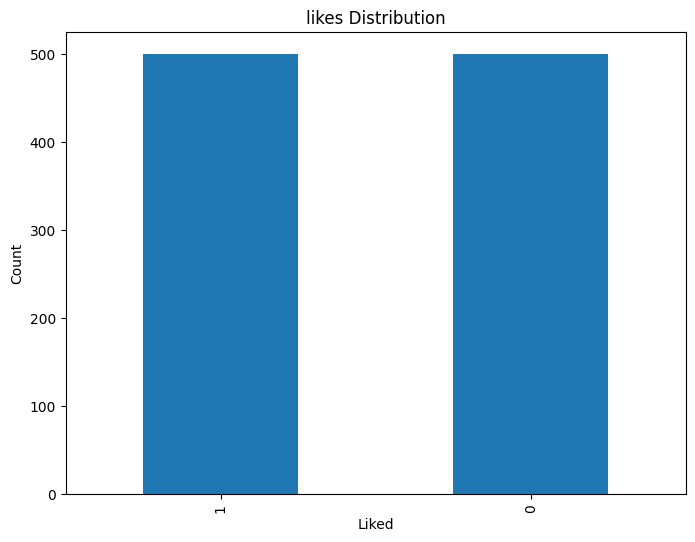

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
count.plot(kind='bar')
plt.title('likes Distribution')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Liked'] = le.fit_transform(data['Liked'])
data.head()


,Review,Liked,chat_count,word_count,sent_count,char_count
0,Wow... Loved this place.,1,24,4,2,24
1,Crust is not good.,0,18,4,1,18
2,Not tasty and the texture was just nasty.,0,41,8,1,41
3,Stopped by during the late May bank holiday of...,1,87,15,1,87
4,The selection on the menu was great and so wer...,1,59,12,1,59


In [ ]:
x = data["Review"]
y = data["Liked"]

In [ ]:
print(x)

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 996, dtype: object


In [ ]:
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 996, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_test.shape

(200,)

In [ ]:
y_test.shape

(200,)

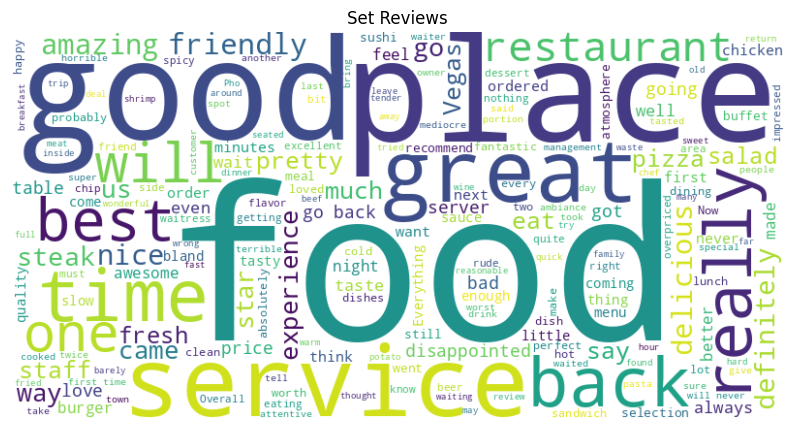

In [ ]:
from wordcloud import WordCloud
text = ' '.join(x_train)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Set Reviews')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
vectorizer = CountVectorizer()# Create a CountVectorizer instance
x_trainbow = vectorizer.fit_transform(x_train)# Fitting the training data
model_lr = LogisticRegression()
model_lr.fit(x_trainbow, y_train)


LogisticRegression()

In [ ]:
x_testbow = vectorizer.transform(x_test)
y_predbow = model_lr.predict(x_testbow)
accuracy_bow = accuracy_score(y_test, y_predbow)
print("BoW Accuracy:", accuracy_bow)

BoW Accuracy: 0.795


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

logreg = LogisticRegression()
logreg.fit(x_train_vec, y_train)

y_pred_logreg = logreg.predict(x_test_vector)
report = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       106
           1       0.87      0.71      0.78        94

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
vectorizer = CountVectorizer()
X_trainbow = vectorizer.fit_transform(x_train)
X_testbow = vectorizer.transform(x_test)

In [ ]:
bowmodel = MultinomialNB()
bowmodel.fit(X_trainbow, y_train)

MultinomialNB()

In [ ]:
y_predictbow = bowmodel.predict(x_testbow)
bowaccuracy = accuracy_score(y_test, y_predictbow)
print("BoW Accuracy:", bowaccuracy)

BoW Accuracy: 0.78


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predictbow)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       106
           1       0.80      0.71      0.75        94

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



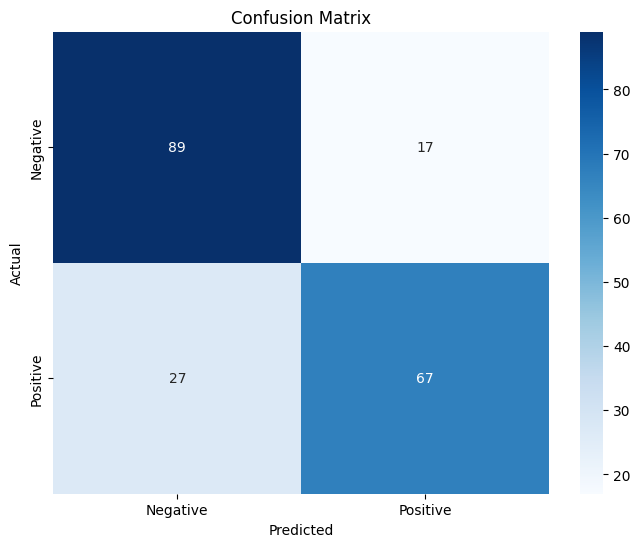

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predictbow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test = "The food was very bad."
review = bowmodel.predict(vectorizer.transform([test]))
print("Review Prediction:", review)

Review Prediction: [0]


In [ ]:
test = "The food was good"
review = bowmodel.predict(vectorizer.transform([test]))
print("Review Prediction:", review)

REVIEW: [1]


In [ ]:
!pip install gensim
from sklearn.manifold import TSNE

In [ ]:
import gensim.downloader as api

In [ ]:
glove_model=api.load('glove-wiki-gigaword-300')

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

In [ ]:
# "x_train, x_test, y_train, y_test = train_test_split(x, y, test_size"=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_trainvec = vectorizer.fit_transform(x_train)#fitting the vectorizer
x_testvector = vectorizer.transform(x_test)
model_svm = SVC(kernel='linear')  # Use a linear kernel for text data
model_svm.fit(x_trainvec, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = model_svm.predict(x_testvector)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.85      0.72      0.78        94

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
def get_glove_embeddings(text, embedding_dim=300):
    words = text.split()
    vectors = [glove_model[word] for word in words if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(vectors, axis=0)  # Return mean vector


In [ ]:
X_train_glove = np.vstack(x_train.apply(get_glove_embeddings))
X_test_glove = np.vstack(x_test.apply(get_glove_embeddings))

print(f"Shape of training embeddings: {X_train_glove.shape}")
print(f"Shape of test embeddings: {X_test_glove.shape}")


Shape of training embeddings: (796, 300)
Shape of test embeddings: (200, 300)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model_glove = LogisticRegression(max_iter=500)
model_glove.fit(X_train_glove, y_train)

LogisticRegression(max_iter=500)

In [ ]:

y_pred_glove = model_glove.predict(X_test_glove)
accuracy_glove = accuracy_score(y_test, y_pred_glove)#evaluating
print("GloVe Accuracy:", accuracy_glove)
report_glove = classification_report(y_test, y_pred_glove)
print("Classification Report:\n", report_glove)


GloVe Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       106
           1       0.72      0.67      0.69        94

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



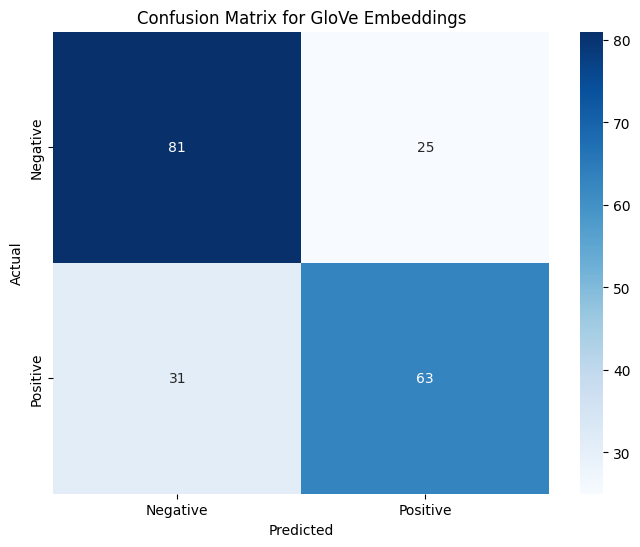

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predglove)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GloVe Embeddings')
plt.show()

In [ ]:
test_text = "The service was excellent and the food was delicious."
test_embedding = get_glove_embeddings(test_text).reshape(1, -1)
review = model_glove.predict(test_embedding)
print("Review prediction:", review)



Review prediction for positive text: [1]


In [ ]:
test_text = "I hated the food."
test_embedding = get_glove_embeddings(test_text).reshape(1, -1)
review = model_glove.predict(test_embedding)
print("Review prediction:", review)

Review prediction: [0]


In [ ]:
from collections import Counter
print(Counter(y_train))


Counter({1: 405, 0: 391})


In [ ]:
from gensim.models import Word2Vec
import numpy as np
sentences = [review.split() for review in x_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
def get_word2vec_embeddings(text, embedding_dim=100):
    words = text.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(vectors, axis=0)


In [ ]:
X_train_word2vec = np.vstack(x_train.apply(get_word2vec_embeddings))
X_test_word2vec = np.vstack(x_test.apply(get_word2vec_embeddings))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logreg_word2vec = LogisticRegression(max_iter=500)
logreg_word2vec.fit(X_train_word2vec, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred_word2vec = logreg_word2vec.predict(X_test_word2vec)
accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
print("Word2Vec Accuracy:", accuracy_word2vec)
report = classification_report(y_test, y_pred_word2vec)
print("Classification Report:\n", report)


Word2Vec Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.06      0.10       106
           1       0.47      0.96      0.63        94

    accuracy                           0.48       200
   macro avg       0.54      0.51      0.37       200
weighted avg       0.54      0.48      0.35       200



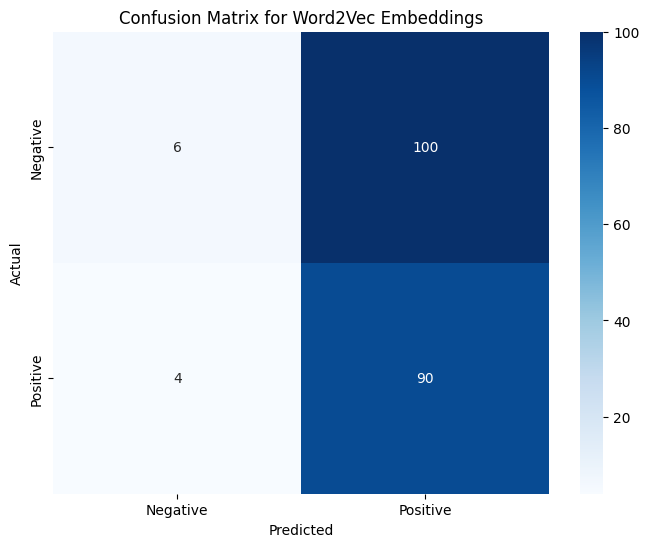

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_word2vec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Word2Vec Embeddings')
plt.show()


In [ ]:
test_text = "The food is not good."
test_embedding = get_word2vec_embeddings(test_text).reshape(1, -1)
review = logreg_word2vec.predict(test_embedding)
print("Review prediction", review)


Review prediction: [0]


In [ ]:
test_text = "The food is good!"
test_embedding = get_word2vec_embeddings(test_text).reshape(1, -1)
review = logreg_word2vec.predict(test_embedding)
print("Review prediction", review)

Review prediction [1]


bert


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
class Foodreview(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()  # the texts has to be in list format
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(
            text,
            padding="max_length",  #the max length
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}
        encoding['labels'] = torch.tensor(label)  # Add the label
        return encoding

In [ ]:
train_dataset = Foodreview(x_train, y_train)
test_dataset = Foodreview(x_test, y_test)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./results",             # Directory to save model checkpoints
    num_train_epochs=1,                 # Total number of epochs for training
    per_device_train_batch_size=2,      # Number of samples per training batch
    per_device_eval_batch_size=4,       # Number of samples per evaluation batch
    warmup_steps=500,                   # Steps to gradually increase learning rate
    max_steps=1000,                     # Limit training to 1000 steps
    weight_decay=0.01,                  # Regularization to prevent overfitting
    logging_dir="./logs",               # Path for saving logs
    evaluation_strategy="epoch",   )     # Perform evaluation after every epoch


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install transformers

In [5]:
from transformers import pipeline
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
reviewanalysis= pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")#pretrained
sample_data = data.sample(100, random_state=42)
sample_reviews = sample_data['Review'].tolist()
predictions = []
for review in sample_reviews:
    prediction = reviewanalysis(review, truncation=True, max_length=512)
    predictions.extend(prediction)
sample_data['predicted_sentiment'] = [pred['label'] for pred in predictions]
sample_data['predicted_score'] = [pred['score'] for pred in predictions]
sample_data[['Review', 'Liked', 'predicted_sentiment', 'predicted_score']].to_csv("sample_predictions.csv", index=False)#saving them in csv

Device set to use cpu


In [ ]:
sample_data = pd.read_csv('sample_predictions.csv')
sample_data.head()

,Review,Liked,predicted_sentiment,predicted_score
0,They were excellent.,1,5 stars,0.782894
1,"Your servers suck, wait, correction, our serve...",0,1 star,0.756957
2,Will be back again!,1,5 stars,0.576304
3,I hate those things as much as cheap quality b...,0,1 star,0.684407
4,I don't think we'll be going back anytime soon.,0,2 stars,0.358271


In [ ]:
text = "I absolutely loved the food"
prediction = reviewanalysis(text)
print(f"Text: {text}")
print(f"Predicted review: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text: I absolutely loved the food
Predicted review: 5 stars
Confidence Score: 0.76


In [ ]:
text = "I did not like the food"
prediction = reviewanalysis(text)
print(f"Text: {text}")# Displaying prediction
print(f"Predicted review: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text: I did not like the food
Predicted review: 2 stars
Confidence Score: 0.49


Rouge score

In [1]:
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=7ffee6fb5c1b7843d6c074602549edb018cd5a4b7c04752a6f8a70e11ab7495c
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [14]:
summary[0]['summary']

'Try them in the airport to experience some tasty food and speedy, friendly service.'

In [28]:
# measure the single word=rouge1
# measure the pair word=rouge2
#Measures the longest sequence of words=rougeL
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
text1 = 'The restaurant at the airport provides delicious food with fast and friendly service, making it a great spot for travelers.'
summaryy = [{"summary": "Try them in the airport to experience some tasty food and speedy, friendly service."}]
scorer1 = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = scorer1.score(text1, summaryy[0]['summary'])
print("\nROUGE scores:")
for rouge_type, score in rouge_scores.items():
    print(f"Average {rouge_type} Score: {score.fmeasure:.4f}")





ROUGE scores:
Average rouge1 Score: 0.3529
Average rouge2 Score: 0.1250
Average rougeL Score: 0.3529


In [29]:
#bleu
text= [text1.split()]
bleu = summaryy[0]['summary'].split()
bleu_score = sentence_bleu(text, bleu)
print(f"\nBLEU Score: {bleu_score:.4f}")


BLEU Score: 0.0000
